In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import numpy as np
from scipy.ndimage.filters import uniform_filter1d
import os
import pandas as pd
import scipy.signal
from PIL import Image

In [10]:
os.chdir("/content/drive/MyDrive/Winter_Research")

In [54]:
 paths = os.listdir("Rois/Roi_1/Straight_v2_rgb")

In [ ]:
paths

In [44]:
# for i in range(cb_rgb.shape[0]):
#   img = Image.fromarray(cb_rgb[i])
#   img.save("Rois/Roi_1/Straight_v2_rgb/CA_straight_rgb_" + str(i) + ".png")

In [85]:
signal = []
for idx, p in enumerate(paths):
  top = parrallax(smooth("Rois/Roi_1/Straight_v2_rgb/" + p, top=True))
  bottom = parrallax(smooth("Rois/Roi_1/Straight_v2_rgb/" + p, top=False))
  clean_img = np.concatenate((top, bottom), axis=1)
  signal.append(clean_img)
  clean_img_pil = Image.fromarray(clean_img)
  clean_img_pil = clean_img_pil.convert("L")
  # print(clean_img_pil)
  # break
  clean_img_pil.save("Rois/Roi_1/clean_signal/" + "clean_img_" + str(idx) + ".png")

In [88]:
signal_np = np.array(signal)

In [94]:
signal_np.shape

(43, 3, 13138)

In [ ]:
signal_np

In [99]:
reshp = signal_np.reshape(signal_np.shape[0], signal_np.shape[1] * signal_np.shape[2])
np.save("Rois/Roi_1/Straight_v2_rgb/signal.npy", reshp)

In [86]:
np.array(clean_img_pil)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [73]:
signal_np = np.array(signal)

In [74]:
signal_np.shape

(43, 3, 13138)

In [29]:
first_pic = cb_rgb[0]
img = first_pic
top=True

In [51]:
x, y, z = parrallax(smooth("Rois/Roi_1/Straight_v2_rgb/CA_straight_rgb_1.png"))

In [101]:
signal_np[10]

array([[ 0.09052289, -0.07418303, -0.07679737, ..., -0.08321077,
        -0.10919116,  0.07830884],
       [-0.24117649, -0.07859476,  0.08169937, ..., -0.00281863,
         0.00306375,  0.00588235],
       [-0.24117649, -0.07859476,  0.08169937, ..., -0.00281863,
         0.00306375,  0.00588235]], dtype=float32)

In [46]:
def smooth(Path, top=True):
  # Load image and rotate for easier plotting
  img = mpimg.imread(Path)
  img = np.rot90(img, 1)

  # Cut out one lane/direction?! only
  if top:
    lane = img[1:4,:,:] # Top lane
  else:
    lane = img[6:10,:,:] # Bottom lane

  # Smooth lane to remove artifacts (probably from straightening) by e.g. 2 or 3 pixels
  lane_smooth = uniform_filter1d(lane, size=2, axis=1)
  #lane_smooth = uniform_filter1d(lane, size=3, axis=0)

  # Calculate background by spatial smoothing in one direction (e.g. 8 pixels wide)
  background = uniform_filter1d(lane, size=8, axis=1)

  # Mean RGB signal perpendicular to street (background removed)
  rgb = np.mean(lane_smooth-background,axis=0)
  return rgb

# Plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


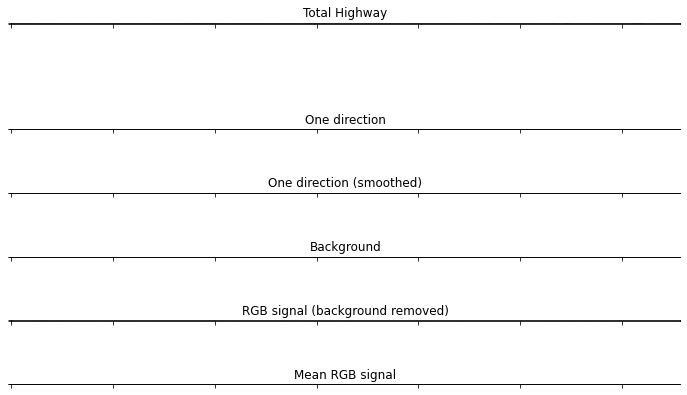

In [31]:
fig = plt.figure(figsize=(12, 8))
dy = lane.shape[0]
gs = gridspec.GridSpec(6, 1, height_ratios=[img.shape[0],dy,dy,dy,dy,dy])

ax0 = fig.add_subplot(gs[0])
ax0.imshow(img)
ax0.set_title('Total Highway')

ax1 = fig.add_subplot(gs[1])
ax1.imshow(lane)
ax1.set_title('One direction')

ax2 = fig.add_subplot(gs[2])
ax2.imshow(lane_smooth)
ax2.set_title('One direction (smoothed)')

ax3 = fig.add_subplot(gs[3])
ax3.imshow(background)
ax3.set_title('Background')

ax4 = fig.add_subplot(gs[4])
ax4.imshow(3*(lane_smooth-background)+0.5)
ax4.set_title('RGB signal (background removed)')

ax5 = fig.add_subplot(gs[5])
ax5.imshow(5*np.repeat(rgb[np.newaxis, :, :], dy, axis=0)+0.5)
ax5.set_title('Mean RGB signal')

gs.update(hspace=0.7)
for ax in fig.get_axes():
    ax.tick_params(labelbottom=False, labelleft=False)

In [50]:
def parrallax(rgb):
  parallax_rb = rgb[:,0] - rgb[:,2]
  parallax_rg = rgb[:,0] - rgb[:,1]
  parallax_gb = rgb[:,1] - rgb[:,2]
  return parallax_rb, parallax_gb, parallax_gb

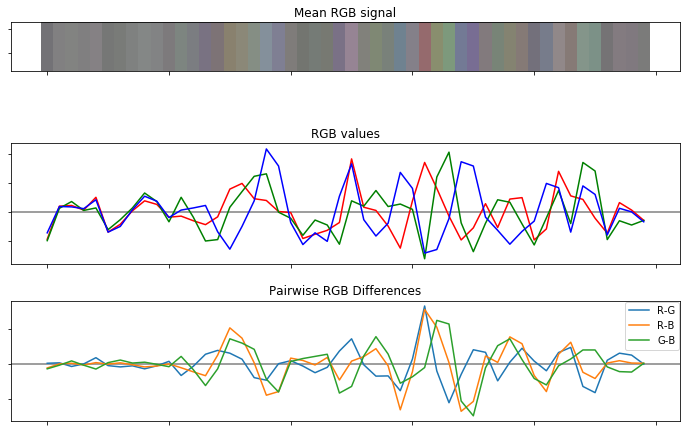

In [ ]:

#parallax = np.stack((parallax_rb,parallax_rg,parallax_gb),axis=1)

# Plotting
fig = plt.figure(figsize=(12, 8))
dy = lane.shape[0]
gs = gridspec.GridSpec(3, 1)#, height_ratios=[img.shape[0],dy,dy,dy,dy,dy])

ax0 = fig.add_subplot(gs[0])
ax0.imshow(5*np.repeat(rgb[np.newaxis, :, :], dy, axis=0)+0.5)
ax0.set_title('Mean RGB signal')

ax1 = fig.add_subplot(gs[1], sharex=ax0)
ax1.axhline(y=0, color='gray')
ax1.plot(rgb[:,0], label='R', color='R')
ax1.plot(rgb[:,1], label='G', color='G')
ax1.plot(rgb[:,2], label='B', color='B')
ax1.set_title('RGB values')

ax2 = fig.add_subplot(gs[2], sharex=ax0)
ax2.axhline(y=0, color='gray')
ax2.plot(parallax_rg, label='R-G')
ax2.plot(parallax_rb, label='R-B')
ax2.plot(parallax_gb, label='G-B')
ax2.legend(loc='top right',borderaxespad=0.1,)
ax2.set_title('Pairwise RGB Differences')


gs.update(hspace=0.3)
for ax in fig.get_axes():
    ax.tick_params(labelbottom=False, labelleft=False)